# Importation des librairies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import os

%matplotlib inline
path_to_data="../data/train"

# Chargement des données
Utilisation d'une dataframe panda

In [59]:
data = {}
data_files = os.listdir(path_to_data)

for datafile in tqdm.tqdm(data_files):
    if "input" in datafile:
        data["input"] = pd.read_csv(
            os.path.join(path_to_data, datafile), delimiter=",", decimal="."
        )
    else:
        data["target"] = pd.read_csv(
            os.path.join(path_to_data, datafile), delimiter=",", decimal="."
        )

100%|██████████| 2/2 [00:00<00:00, 54.55it/s]


# Description des données

In [60]:
len(data['input'])

1087

In [4]:
len(data['target'])

1087

In [5]:
data['input'].describe()

,_ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,...,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,544.000000,0.324930,0.598499,0.004600,0.092906,0.096465,0.023919,0.007820,0.132674,0.092115,...,0.050943,0.056610,0.027599,0.134391,0.155980,0.009972,0.004600,0.016559,0.031279,0.002883
std,313.934176,0.127109,0.112948,0.052357,0.101186,0.113275,0.152867,0.072343,0.088995,0.084020,...,0.098945,0.136687,0.163896,0.176417,0.103498,0.062025,0.067697,0.086610,0.174150,0.041849
min,1.000000,0.000000,-0.045405,0.000000,0.000000,0.000000,0.000000,0.000000,0.006862,0.000000,...,0.000000,-0.007090,0.000000,-0.001502,0.004104,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.500000,0.248555,0.540171,0.000000,0.028135,0.020824,0.000000,0.000000,0.083894,0.046002,...,0.000000,0.000000,0.000000,0.000000,0.095754,0.000000,0.000000,0.000000,0.000000,0.000000
50%,544.000000,0.303300,0.608965,0.000000,0.066682,0.072494,0.000000,0.000000,0.112968,0.077890,...,0.000000,0.000000,0.000000,0.049144,0.135002,0.000000,0.000000,0.000000,0.000000,0.000000
75%,815.500000,0.369575,0.668921,0.000000,0.134380,0.131796,0.000000,0.000000,0.149047,0.112930,...,0.125000,0.000000,0.000000,0.227662,0.177760,0.000000,0.000000,0.000000,0.000000,0.000000
max,1087.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Separation du dataset en train-set et test-set

In [61]:
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

filter_sample = np.where(data["target"]["Y"] == 0)[0]

target = data['target'].drop(columns=["_ID"])

features = data['input'].drop(columns=["_ID"])

# features = features[['X2', 'X9', 'X12', 'X14', 'X21', 'X26', 'X27', 'X33', 'X41', 'X58', 'X67', 'X69', 'X72', 'X77', 'X79', 'X85', 'X89', 'X99', 'X102', 'X106', 'X107', 'X108', 'X120', 'X126', 'X129', 'X132', 'X133', 'X142', 'X146', 'X150', 'X155', 'X157', 'X159', 'X171', 'X179', 'X194', 'X203', 'X207', 'X214', 'X223', 'X225', 'X226', 'X230', 'X231', 'X232', 'X233', 'X237', 'X243', 'X252', 'X253', 'X261', 'X264', 'X280', 'X284', 'X288', 'X300', 'X309', 'X316', 'X330', 'X333']]

x_train, x_valid, y_train, y_valid = train_test_split(features,target,test_size=0.20,random_state=0)
y_train = y_train.values.ravel()
y_valid = y_valid.values.ravel()
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)
scaler = StandardScaler()
pca = PCA(n_components=0.95)

# pipeline = Pipeline([("pca", pca), ('scaler', scaler)])
# x_train = pipeline.fit_transform(x_train)
# x_valid = pipeline.transform(x_valid)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)

(869, 295) (218, 295) (869,) (218,)
(869, 295) (218, 295) (869,) (218,)


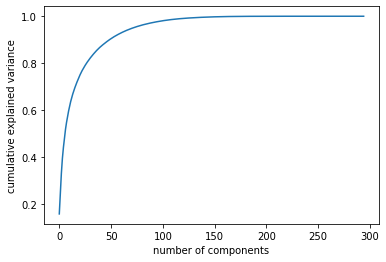

In [4]:
pca = PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Modele de Régression

## Importation des métriques

In [5]:
from sklearn.metrics import r2_score, mean_squared_error

## Random Forest

### Prédiction

In [ ]:
# StandardScalar et PCA(0.95)
extra_trees_params = {
  "max_depth": 20,
  "max_features": 85,
  "min_samples_split": 4,
  "n_estimators": 80
}

In [16]:
features.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,...,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000
mean,0.324930,0.598499,0.004600,0.092906,0.096465,0.023919,0.007820,0.132674,0.092115,0.040216,...,0.050943,0.056610,0.027599,0.134391,0.155980,0.009972,0.004600,0.016559,0.031279,0.002883
std,0.127109,0.112948,0.052357,0.101186,0.113275,0.152867,0.072343,0.088995,0.084020,0.075777,...,0.098945,0.136687,0.163896,0.176417,0.103498,0.062025,0.067697,0.086610,0.174150,0.041849
min,0.000000,-0.045405,0.000000,0.000000,0.000000,0.000000,0.000000,0.006862,0.000000,0.000000,...,0.000000,-0.007090,0.000000,-0.001502,0.004104,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248555,0.540171,0.000000,0.028135,0.020824,0.000000,0.000000,0.083894,0.046002,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.095754,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.303300,0.608965,0.000000,0.066682,0.072494,0.000000,0.000000,0.112968,0.077890,0.000000,...,0.000000,0.000000,0.000000,0.049144,0.135002,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.369575,0.668921,0.000000,0.134380,0.131796,0.000000,0.000000,0.149047,0.112930,0.038134,...,0.125000,0.000000,0.000000,0.227662,0.177760,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
features["X6"].value

In [27]:
S = 0
for feat in features.columns:
    S += 1 if len(features[feat].value_counts()) <= 2 else 0
S

48

In [65]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.01,0.05,0.1,1,0.5], #so called `eta` value
              'min_samples_leaf': [4,5,6],
              'subsample': [0.6,0.7,0.8],
              "min_samples_split" : np.arange(4, 8, 2),
              'max_depth': np.arange(18, 28, 4),
              'max_features': np.arange(30, 100, 10),
              'n_estimators': np.arange(70, 120, 10),

              }

gbr = GradientBoostingRegressor(loss='squared_error', criterion='squared_error', n_estimators=100, max_features=40)

gbr.fit(x_train, y_train)
print(gbr.score(x_train, y_train))

y_pred_gbr = gbr.predict(x_valid)

print("MSE : ", mean_squared_error(y_valid, y_pred_gbr))
print("MSE : ", mean_squared_error(y_train, gbr.predict(x_train)))


0.7961037091998431
MSE :  0.041768063326981984
MSE :  0.020362096218603135


In [ ]:


rfr = RandomForestRegressor(bootstrap=False, n_jobs=-1)


param_grid = { 
            "min_samples_split" : np.arange(4, 8, 2),
            'max_depth': np.arange(18, 28, 1),
            'max_features': np.arange(50, 150, 5),
            'n_estimators': np.arange(70, 120, 5),
            }



In [55]:
from sklearn.svm import NuSVR


nusvr = NuSVR(C=0.7, gamma=0.009, kernel='rbf', nu=0.6)

nusvr.fit(x_train, y_train)
print(nusvr.score(x_train, y_train))

y_pred_svr = nusvr.predict(x_valid)

print("MSE : ", mean_squared_error(y_valid, y_pred_svr))
print("MSE : ", mean_squared_error(y_train, nusvr.predict(x_train)))

0.8449192900987317
MSE :  0.045595937823241006
MSE :  0.015487129875029952


In [22]:
from sklearn.ensemble import ExtraTreesRegressor


etr = ExtraTreesRegressor(bootstrap=False, 
                            max_depth=20, 
                            max_features=72,
                            min_samples_split=4, 
                            n_estimators=80, 
                            n_jobs=-1)

etr.fit(x_train, y_train)
print(etr.score(x_train, y_train))

y_pred_etr = etr.predict(x_valid)

print("MSE : ", mean_squared_error(y_valid, y_pred_etr))
print("MSE : ", mean_squared_error(y_train, etr.predict(x_train)))

0.9963960945156827
MSE :  0.0428829390822228
MSE :  0.0003599038999014685


In [23]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(bootstrap=False, 
                            max_depth=22, 
                            max_features=50,
                            min_samples_split=4, 
                            n_estimators=80, 
                            n_jobs=-1)

rfr.fit(x_train, y_train)

y_pred_rfr = rfr.predict(x_valid)

print("MSE : ", mean_squared_error(y_valid, y_pred_rfr))
print("MSE : ", mean_squared_error(y_train, rfr.predict(x_train)))


MSE :  0.04878181001977928
MSE :  0.00015105239512055256


In [ ]:
importances = rfr.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking:")

for f in range(x_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(x_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, 50])
plt.show()

In [12]:
from sklearn import neighbors
K = 0
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_pred_rfr = model.predict(x_valid) #make prediction on test set
    error = mean_squared_error(y_valid, y_pred_rfr)
    rmse_val.append(error) #store rmse values
    print('mse value for k= ' , K , 'is:', error)

mse value for k=  1 is: 0.09068380656034798
mse value for k=  2 is: 0.06648351307351705
mse value for k=  3 is: 0.06043437622023697
mse value for k=  4 is: 0.06408998568484414
mse value for k=  5 is: 0.06084242307144231
mse value for k=  6 is: 0.06212715627574065
mse value for k=  7 is: 0.06131878039954564
mse value for k=  8 is: 0.06097525829650922
mse value for k=  9 is: 0.060235380313612946
mse value for k=  10 is: 0.06187903574244834
mse value for k=  11 is: 0.06265166039069099
mse value for k=  12 is: 0.06194918882658074
mse value for k=  13 is: 0.06351187995615121
mse value for k=  14 is: 0.06471985714143758
mse value for k=  15 is: 0.0644320539645123
mse value for k=  16 is: 0.06503699104081845
mse value for k=  17 is: 0.06489876452106698
mse value for k=  18 is: 0.06588483021720938
mse value for k=  19 is: 0.06670844224150885
mse value for k=  20 is: 0.06619879320450182


In [24]:
model = neighbors.KNeighborsRegressor(n_neighbors = 9)

model.fit(x_train, y_train)
# print(model.score(x_train, y_train))

y_pred_knn = model.predict(x_valid)

print("MSE valid: ", mean_squared_error(y_valid, y_pred_knn))

print("MSE train: ", mean_squared_error(y_train, model.predict(x_train)))

MSE valid:  0.060235380313612946
MSE train:  0.05041241190018628


array([-0.11665752, -0.03858076,  0.02908972,  0.54430597,  0.25648458,
        0.20246105,  0.06415844, -0.2543619 ,  0.32491364,  0.59665691,
        0.24849742,  0.0042993 ,  0.12437575,  0.2763904 ,  0.00186252,
        0.20127794, -0.08851736, -0.21035245,  0.39740966,  0.00224382,
       -0.30725486,  0.3444603 ,  0.3591109 , -0.26805749, -0.20678012,
        0.06327012,  0.26226724, -0.11192408, -0.09436844, -0.04042074,
       -0.37781041,  0.20401068, -0.14957117,  0.54955939, -0.49630639,
        0.05829324, -0.05059517, -0.07155629, -0.22502785, -0.11679184,
       -0.08895093,  0.00722892, -0.32249388, -0.33778471,  0.15854423,
        0.1595676 ,  0.29972705, -0.06930382, -0.19422007,  0.14866907,
        0.02211013, -0.37320723,  0.086353  ,  0.31560849, -0.13044946,
       -0.05524695, -0.14354534, -0.32820308, -0.11729596,  0.19277846,
       -0.40274867, -0.16338337,  0.16094081, -0.22878542,  0.20265296,
       -0.33836901, -0.13648221,  0.02901133,  0.03083263, -0.08

In [29]:
np.mean(np.array([y_pred_svr, y_pred_etr, y_pred_knn, y_pred_rfr]), axis=0).shape

(218,)

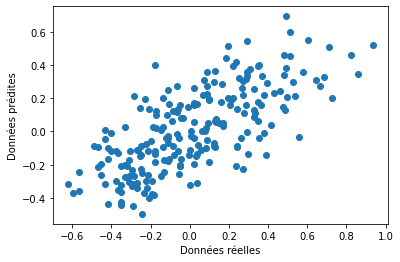

In [20]:
plt.plot(y_valid, y_pred_rfr, 'o')
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.show()

In [19]:
data_files = os.listdir('../data/test')

for datafile in tqdm.tqdm(data_files):
    if "input" in datafile:
        test_data = pd.read_csv(
            os.path.join('../data/test', datafile), delimiter=",", decimal="."
        )

test_data.head()

100%|██████████| 1/1 [00:00<00:00, 23.89it/s]


,_ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X330,X331,X332,X333,X334,X335,X336,X337,X338,X339
0,1088,0.421261,0.546021,0,0.029268,0.000000,0,0,0.062175,0.059580,...,0.0,0.224574,0,0.000000,0.064333,0,0,0.0,0,0.0
1,1089,0.336232,0.727931,0,0.134967,0.194293,0,0,0.183858,0.099622,...,0.0,0.000000,0,0.170102,0.195474,0,0,0.0,0,0.0
2,1090,0.335788,0.567076,0,0.108601,0.040054,0,0,0.089720,0.078247,...,0.0,0.000000,0,0.177861,0.107409,0,0,0.0,0,0.0
3,1091,0.328875,0.580493,0,0.147206,0.046594,0,0,0.103053,0.063454,...,0.0,0.000000,0,0.000000,0.118341,0,0,0.0,0,0.0
4,1092,0.248126,0.658921,0,0.000000,0.000000,0,0,0.098379,0.002061,...,0.0,0.000000,0,0.261934,0.159203,0,0,0.0,0,0.0


In [20]:
test_data.X6.value_counts()

0    271
1      1
Name: X6, dtype: int64

In [11]:
x_test = test_data.drop(columns=["_ID"])
x_test = pipeline.transform(x_test)

In [12]:
y_pred_test = rfr.predict(x_test)
y_pred_test.shape

(272,)

In [13]:
test_data['_ID'].to_numpy().shape


(272,)

In [14]:
output = np.concatenate((test_data["_ID"].to_numpy().reshape(-1,1), y_pred_test.reshape(-1,1)), axis=1)

In [15]:
output_df = pd.DataFrame(output, columns=['_ID', 'Y'])
output_df = output_df.astype({'_ID': 'int32'})
output_df.to_csv('output.csv', index=False)

# Enregistrement des modèles

In [17]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_2.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

with open(modele_path + 'random_forest_rm_2.pkl', 'wb') as f:
    pickle.dump(rfr, f)
    
with open(modele_path + 'random_forest_A_2.pkl', 'wb') as f:
    pickle.dump(rfr_A, f)  


FileNotFoundError: [Errno 2] No such file or directory: './modeles/random_forest_re02_2.pkl'

# Chargement des modèles

In [ ]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_2.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_2.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_2.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


-------------------------
Résistance mécanique Rm
-------------------------
Train:  0.9978717285976809
Test:  0.688109371453149
-------------------------
Résistance élastique Re02
-------------------------
Train:  0.9990943697802303
Test:  0.8004542256582448
mse
-------------------------
Allongement à la rupture A%
-------------------------
Train:  0.9991336403334773
Test:  0.8387497814415037
